In [1]:
"""
Today we will be tackling classification problems using SeaLion. This means instead of trying
to predict continuous values, we predict classes like 0 and 1 (binary) or 0, 1, 2, 3 (multi-class).
Make sure, given the python programmer you are, to always start counting with 0 in machine 
learning with the labels! 
"""

import sealion as sl 
from sealion.regression import LogisticRegression, SoftmaxRegression

In [2]:
# first we'll start with Logistic Regression, which we will use the breast cancer dataset on 
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer()['data'], load_breast_cancer()['target']

Text(0.5, 0.92, 'Breast Cancer Dataset 3D PCA')

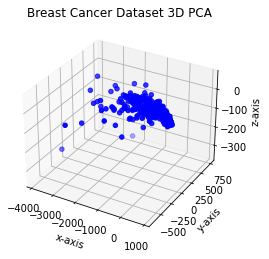

In [3]:
#we'll visualize it, just for fun
from sealion.DimensionalityReduction import PCA
import matplotlib.pyplot as plt
import seaborn as sns # we'll need this for the confusion matrix (as of v3.0.8)
X_3D = PCA(3).transform(X) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c='blue', marker='o')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.title("Breast Cancer Dataset 3D PCA")

In [4]:
# the data is a cluster, so now the line will have to find something that separates the 
# two classes - positive (1) and negative (0)

# but first, let's split our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

In [5]:
#let's just take a look at our data
#X_train, y_train

In [6]:
#notice how X_train is 2D and y_train is 1D - with regression classes that's how it should be. 
#even for softmax regression where y_train maybe something like array([1, 2, 3, 0]) - do NOT
# one hot encode it. 

"""
Now's a good time to talk about what logistic regression actually is. All it is a sigmoid line, 
or the logistic function, used to separate two classes in any number of dimensions. You may 
want to read up (or watch up) on the stat quest here : https://www.youtube.com/watch?v=yIYKR4sgzI8
Logistic regression doesn't have a closed-form solution, so it will have to use gradient descent - which 
is an iterative algorithm. 
"""

# let's first set it up
logistic_regression = LogisticRegression(learning_rate = 0.1, 
                                         max_iters = 1500, 
                                         accuracy_desired = 0.95, 
                                         show_acc = True)

# woah! compared to linear regression that's a lot of parameters. Here's what they mean : 
# learning rate : simply how fast the model will learn on a scale of 0 - 1. Recommended starting
# point is 0.01 (default)
# max_iters : max number of iterations you allow gradient descent to run for, 1000 default
# accuracy_desired : the percent accuracy of the model you are fine stopping at - if your
# model can't get up to 99% accuracy then you may as well just stop it at whatever you are fine at. On a scale of 0 - 1. 
# show_acc : whether or not you want to see the accuracy during the training tqdm loop


# luckily, all of these parameters have defaults - but I just wanted to introduce them all here

In [7]:
#next, let's fit the model!
logistic_regression.fit(X_train, y_train)

accuracy : 92.97% : 100%|██████████| 1500/1500 [00:15<00:00, 96.08it/s] 


In [8]:
# 93% accuracy is pretty good for a model like this, but remember - it's the testing/validation accuracy 
# that really matters. 

val_acc = logistic_regression.evaluate(X_test, y_test)
print("Validation accuracy : ", val_acc) # 85%, pretty good

Validation accuracy :  0.8157894736842105


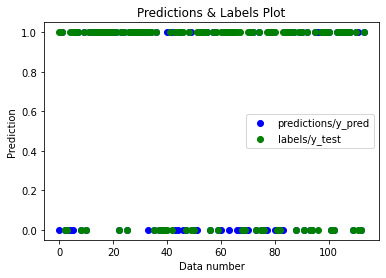

In [9]:
# the next thing we could procede to do is plot this : 
y_pred = logistic_regression.predict(X_test)
logistic_regression.visualize_evaluation(y_pred, y_test) 
# the x-axis, data number, is just the indice for the data point

array([[29.,  5.],
       [16., 64.]])

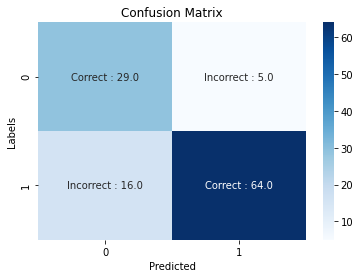

In [10]:
# for the most part the green (labels) and blue (predictions) are similar, so that's a good thing.

# we could take this a step further and make a confusion matrix
from sealion.utils import confusion_matrix
confusion_matrix(y_pred, y_test)

In [11]:
# here we see that most of our incorrect problems are false negatives, where we predict that 
# someone is all good when they indeed have breast cancer. Take a second to think about which 
# is worse. These are questions that often come up when implementing such machine learning
# systems. 

In [12]:
# Anways, now we are onto Softmax regression!

# softmax regression is easy to understand once you know what logistic regression. Actually it's
# counter-intuitive to teach it after logistic regression, considering that logistic regression
# is just softmax regression when the number of classes is 2. 

# Softmax regression is just logistic regression, except when the number of classes is not 2. 
# It uses the softmax function, instead of the logistic, to model the data. You can set
# the number of classes equal to 2 here with the SoftmaxRegression class but that just defeats
# purpose. 

In [13]:
# alright, that's a lot of comments - as Linus said : talk is cheap, show me the code. 

# we'll be using the iris dataset which has 3 different categories : iris setosa, 
# iris versicolor, and iris virginica.
from sklearn.datasets import load_iris
X, y = load_iris()['data'], load_iris()['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

In [14]:
# again let's look at our data
X_train, y_train

(array([[5.8, 4. , 1.2, 0.2],
        [4.8, 3.4, 1.9, 0.2],
        [6.9, 3.1, 5.4, 2.1],
        [6.6, 2.9, 4.6, 1.3],
        [4.4, 2.9, 1.4, 0.2],
        [5.2, 3.5, 1.5, 0.2],
        [6.7, 3. , 5. , 1.7],
        [4.5, 2.3, 1.3, 0.3],
        [6.4, 2.7, 5.3, 1.9],
        [6.2, 2.2, 4.5, 1.5],
        [6.4, 2.8, 5.6, 2.1],
        [5.8, 2.7, 3.9, 1.2],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.5, 1.4, 0.3],
        [6.1, 3. , 4.9, 1.8],
        [6.4, 3.2, 4.5, 1.5],
        [5.1, 3.3, 1.7, 0.5],
        [6. , 2.7, 5.1, 1.6],
        [5.8, 2.7, 5.1, 1.9],
        [5.4, 3. , 4.5, 1.5],
        [4.8, 3. , 1.4, 0.3],
        [5. , 3.2, 1.2, 0.2],
        [5.8, 2.7, 5.1, 1.9],
        [7. , 3.2, 4.7, 1.4],
        [6.1, 2.8, 4.7, 1.2],
        [4.9, 3.1, 1.5, 0.2],
        [6.3, 3.4, 5.6, 2.4],
        [5.1, 3.8, 1.5, 0.3],
        [6.5, 3. , 5.5, 1.8],
        [5.7, 2.9, 4.2, 1.3],
        [5. , 3.6, 1.4, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [6.8, 3.2, 5.9, 2.3],
        [5

Text(0.5, 0.92, 'Iris Dataset 3D')

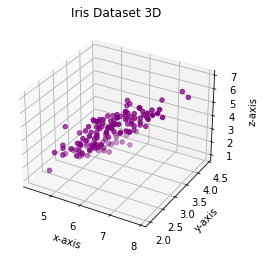

In [15]:
# We can visualize X with no dimensionality reduction (as it is in 3D here) - just a good habit
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,  0], X[:, 1], X[:, 2], c='purple', marker='o') 

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.title("Iris Dataset 3D")

In [25]:
# a cluster as well. 

# now let's use softmax regression
softmax_regression = SoftmaxRegression(num_classes = 3, # we have 3 classes here
                                       learning_rate = 0.05, 
                                       max_iters = 1000, 
                                       accuracy_desired = 1.0) # a little higher standards here

# note the num_classes argument : that's a must. 

# now we can fit it!
softmax_regression.fit(X_train, y_train) # note that the labels are NOT one-hot-encoded

accuracy : 97.5% : 100%|██████████| 1000/1000 [00:12<00:00, 79.39it/s] 


In [26]:
# we can get it's predictions like such : 
y_pred = softmax_regression.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1])

In [27]:
# and let's evaluate it (this is just what percent of y_pred is y_test)
evaluation = softmax_regression.evaluate(X_test, y_test)
evaluation

1.0

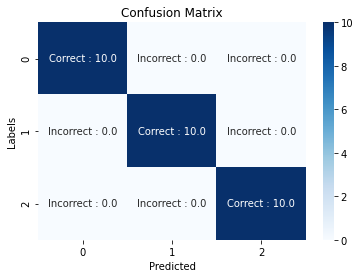

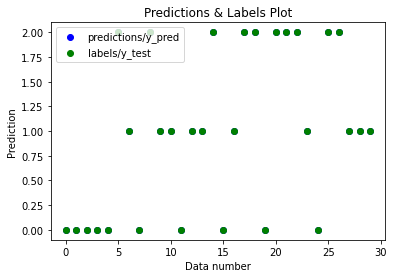

In [28]:
# WOW ... the model did fantastic

# once again we can use a confusion matrix once again and plot the predictions
confusion_matrix(softmax_regression.predict(X_test), y_test)

ax = plt.figure() # just to separate the plots
softmax_regression.visualize_evaluation(softmax_regression.predict(X_test), y_test)

In [29]:
# Well it looks like we did pretty good on these algorithms today. They are really the fundamentals
# of machine learning. Have fun!